# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [421]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")


In [422]:
penguins_clean=penguins_df.copy()
print(penguins_clean.isnull().sum())
penguins_clean.dropna(inplace=True)
penguins_clean.reset_index(drop=True, inplace=True)

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


In [423]:
for col in [col for col in penguins_clean.columns if col != 'sex']:
    print(f"*****************{col}*********************")
    iqr=penguins_clean[col].quantile(0.75)-penguins_clean[col].quantile(0.25)
    upper_limit=penguins_clean[col].quantile(0.75)+1.5*iqr
    lower_limit=penguins_clean[col].quantile(0.25)-1.5*iqr
    outlier_number=(penguins_clean[col]>upper_limit).sum() + (penguins_clean[col]<lower_limit).sum()
    if(outlier_number > 0):
        print(f"{outlier_number}  outlier detected")
        outlier_indexes = penguins_clean[(penguins_clean[col]<lower_limit) | (penguins_clean[col]>upper_limit)].index
        print(penguins_clean.loc[outlier_indexes])
        penguins_clean = penguins_clean.drop([7,10])
    else:
        print("There is no outlier")
penguins_clean.reset_index(drop=True, inplace=True)

*****************culmen_length_mm*********************
There is no outlier
*****************culmen_depth_mm*********************
There is no outlier
*****************flipper_length_mm*********************
2  outlier detected
    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
7               42.0             20.2             5000.0       4250.0  MALE
10              34.6             21.1             -132.0       4400.0  MALE
*****************body_mass_g*********************
There is no outlier


In [424]:
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)

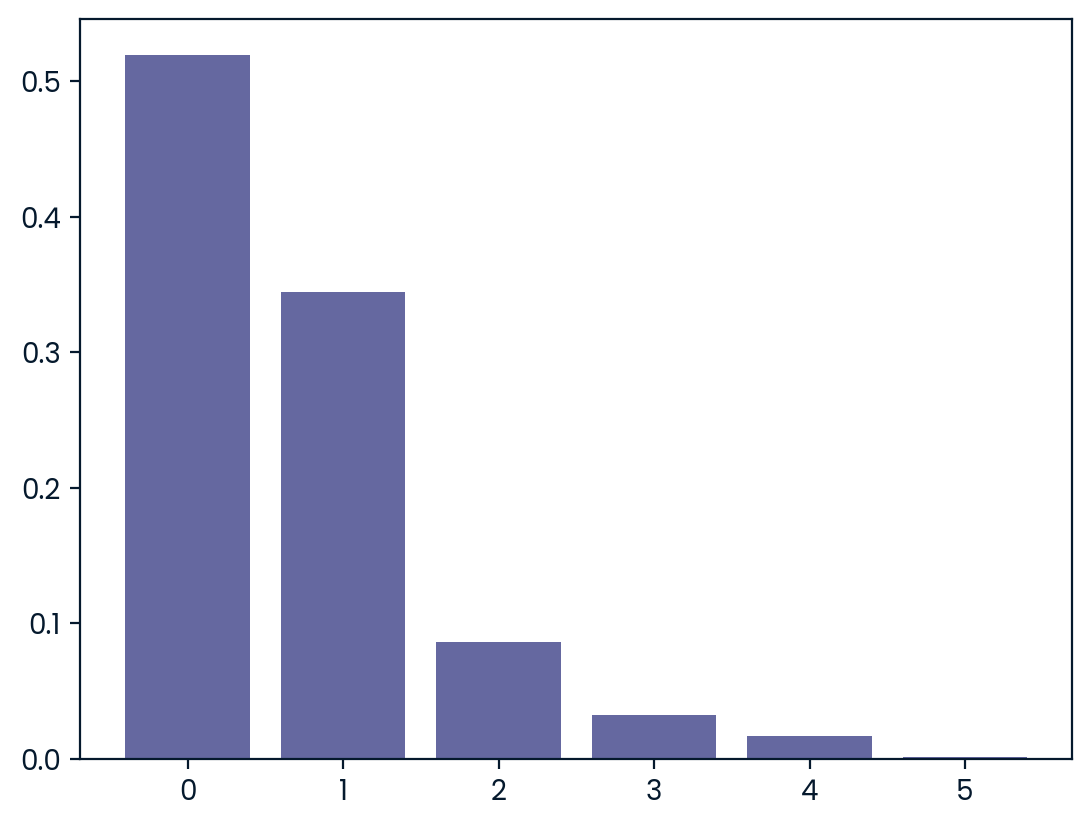

In [425]:
pca=PCA(random_state=42)
pca_features = pca.fit_transform(penguins_preprocessed)
pca_features
plt.bar(x=range(6),height=pca.explained_variance_ratio_)
plt.show()

In [426]:
n_components=2
pca_2=PCA(n_components=n_components, random_state=42)
penguins_PCA = pca_2.fit_transform(penguins_preprocessed)
penguins_PCA[:5,:]

array([[-0.72952069, -2.09719199],
       [-1.9293044 ,  0.4121497 ],
       [-1.95352479,  0.3084854 ],
       [-2.28817761, -0.15827773],
       [-0.62182165, -2.51402049]])

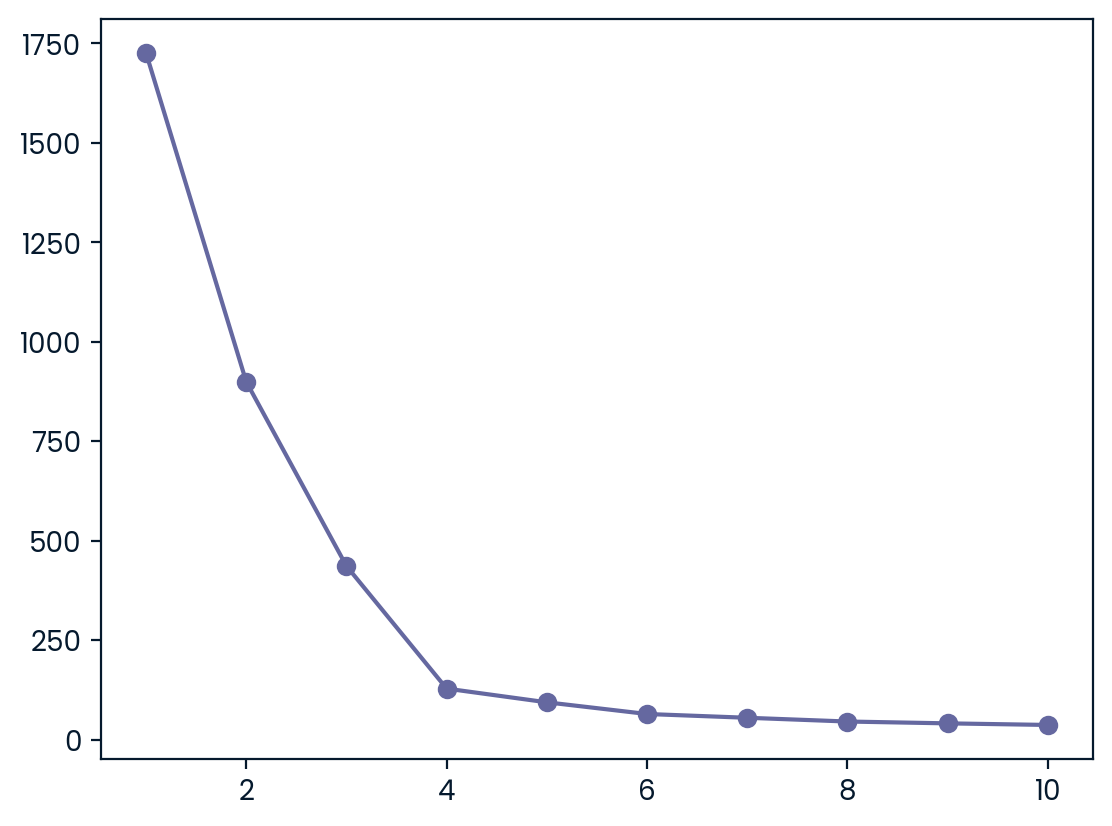

In [427]:
inertias = []
for i in range(1,11):
    kmeans=KMeans(random_state=42,n_clusters=i)
    kmeans.fit(penguins_PCA)
    inertias.append(kmeans.inertia_)
    
plt.scatter(x=range(1,11),y=inertias)
plt.plot(range(1,11), inertias)
plt.show()
n_clusters = 4

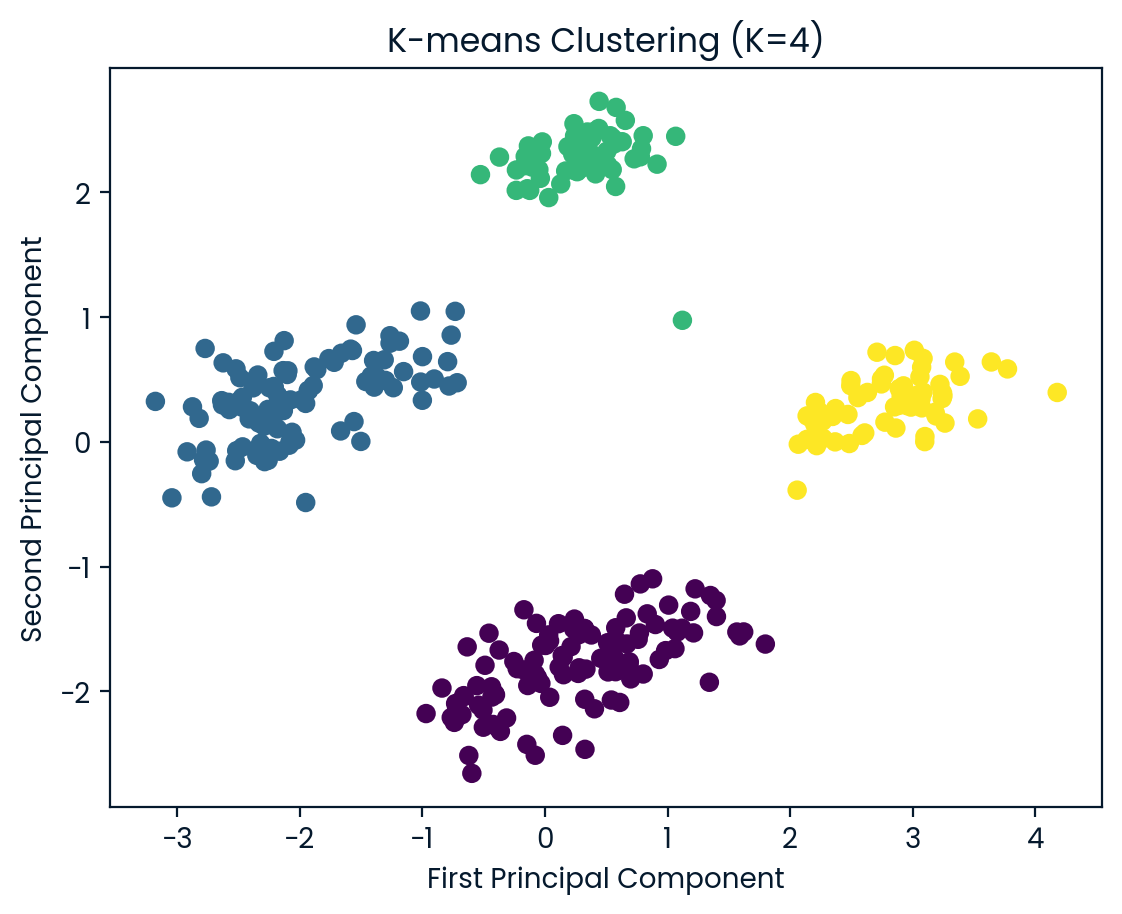

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             43.878302        19.111321         194.764151  4006.603774
1             40.217757        17.611215         189.046729  3419.158879
2             45.545763        14.262712         212.779661  4683.050847
3             49.473770        15.718033         221.540984  5484.836066


In [428]:
model = KMeans(n_clusters=n_clusters, random_state = 42)
model.fit(penguins_PCA)
labels=model.predict(penguins_PCA)
plt.scatter(x=penguins_PCA[:,0], y=penguins_PCA[:,1], c=labels)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()
penguins_clean["label"] = labels
num_cols=["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]
stat_penguin=penguins_clean.groupby("label").agg({col: "mean" for col in num_cols})
print(stat_penguin)